# Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be sequences, text or speech).
Another common term for NLP problem is sequence to sequence problems (seq2seq).

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0854586f-dbee-ca93-7a68-8f07c9ac47e0)


## Get helper functions

In [2]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py

--2024-02-11 20:26:59--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-02-11 20:27:00 (131 MB/s) - ‘helper.py’ saved [13380/13380]



In [3]:
# Import
from helper import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text sample of tweeets labelled as disaster or not disaster).
Original source [here](https://www.kaggle.com/c/nlp-getting-![2024-02-10 (7).png](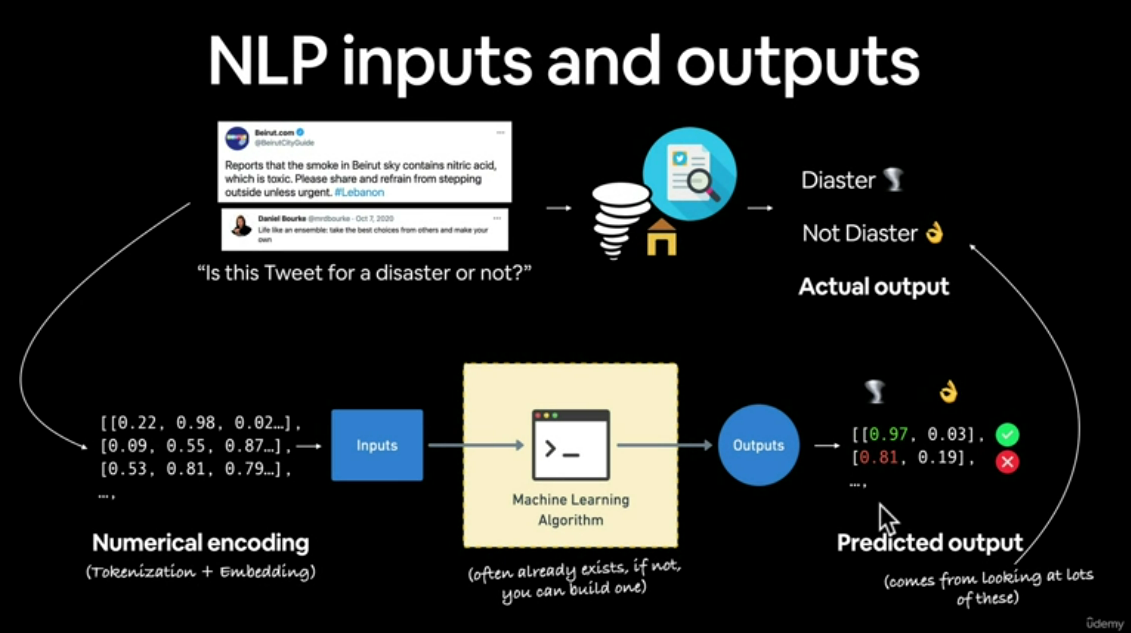![2024-02-10 (7).png](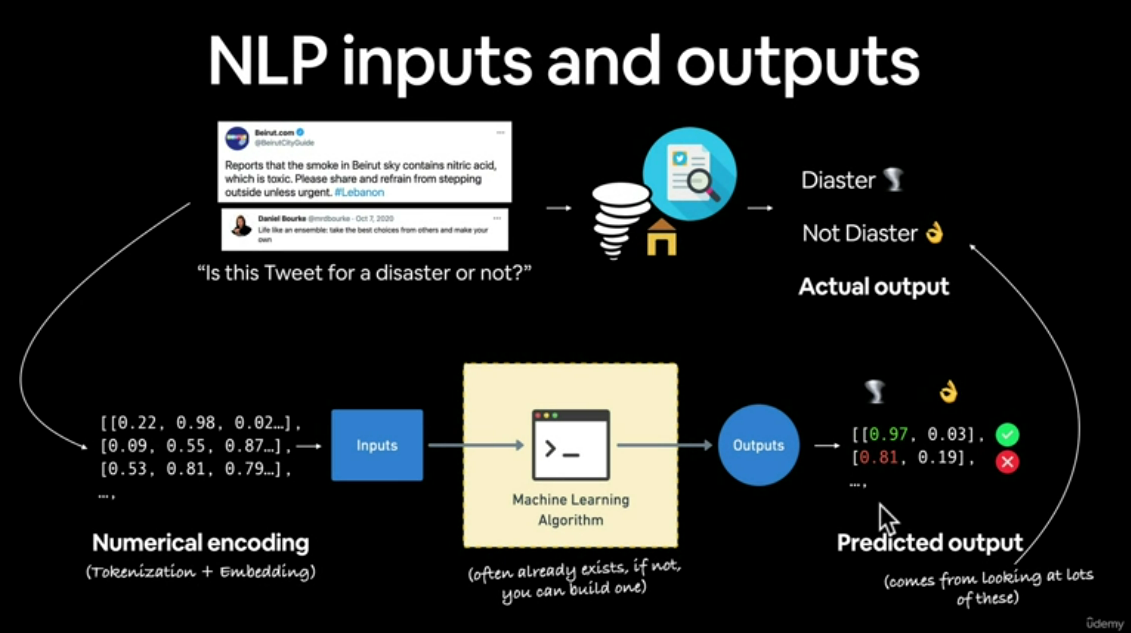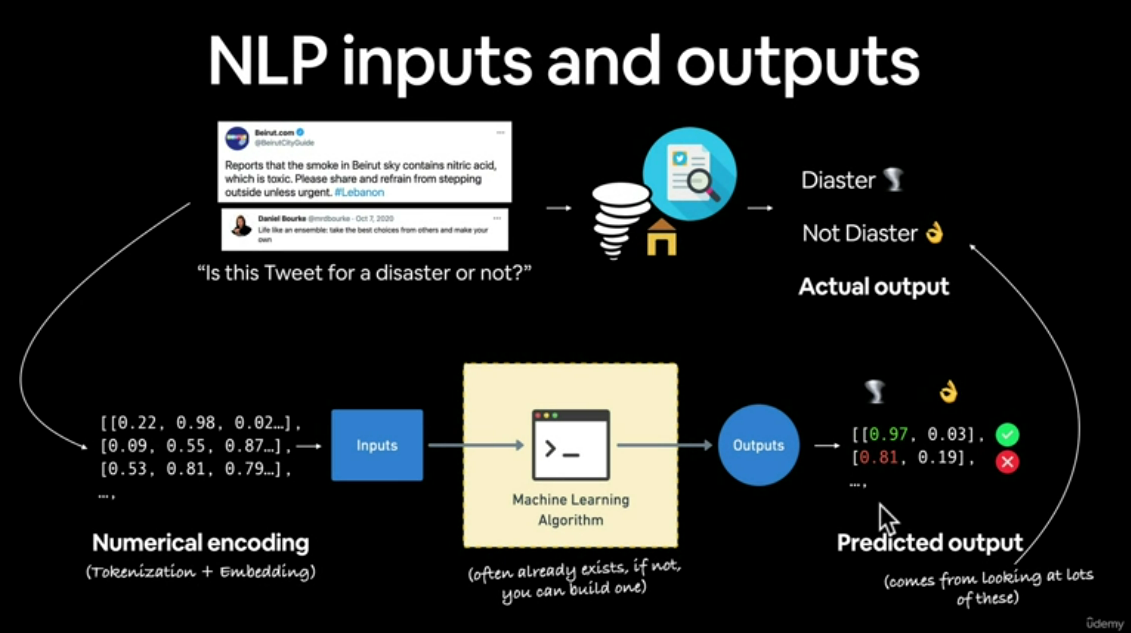))started)

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-02-11 20:27:04--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   724KB/s    in 0.8s    

2024-02-11 20:27:05 (724 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

To visualize our text samples, we fitst have to read them in, one way to do so would be to use [python](https://realpython.com/read-write-files-python/)

I prefer to get visual straight away.

Another way to do this is to use pandas.

In [6]:
# Pandas have a methos load_csv
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# What does the test dataframe look like? (no target)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

The data looks balaced, shhould it not be balanced there is a [method](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data) in tensorflow to fix this.

placeholder picture

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Lets visualize some random training examples
import random
random_index = random.randint(0, len(train_df) -5) # -5 so we dont go past the lenght of the frame
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
@Habbo bring back games from the past. Snowstorm. Tic tac toe. Battleships. Fast food. Matchwood.

---

Target: 1 (real disaster)
Text:
'@PhelimKine: #Myanmar 's Displaced #Rohingya at #Sittwe point of no return http://t.co/8gO68KjE4b  http://t.co/0KrW1zYaHM'

---

Target: 0 (not real disaster)
Text:
I hope you fall off a cliff

---

Target: 0 (not real disaster)
Text:
@JustineJayyy OHGOD XD I didn't mean it so =P But you have that fire truck in the back of you to make up for it so you good xD

---

Target: 0 (not real disaster)
Text:
Repulsive! Refugees-Victimiser-#Dutton Evangelical-Liar-#Abbott c/o #LNP on a dupe the press overdrive; #CHOPPERGATE!#BRONWYNBISHOP!#AUSPOL

---



### Split data into training and validation set

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
# Use train_test_split to split training data into training and validation sets
train_scentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                             train_df_shuffled["target"].to_numpy(),
                                                             test_size=0.1, # use 10% of training data for validation
                                                             random_state=42)

In [18]:
# Check the lengths
len(train_scentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)